# Business Understanding

Customer churn is the loss of clients or customers. In order to avoid losing customers, a company needs to examine why its customers have left in the past and which features are more important to determine who will churn in the future. Our task is therefore to predict whether customers are about to churn and which are the most important features to get that prediction right. As in most prediction problems, we will use machine learning.

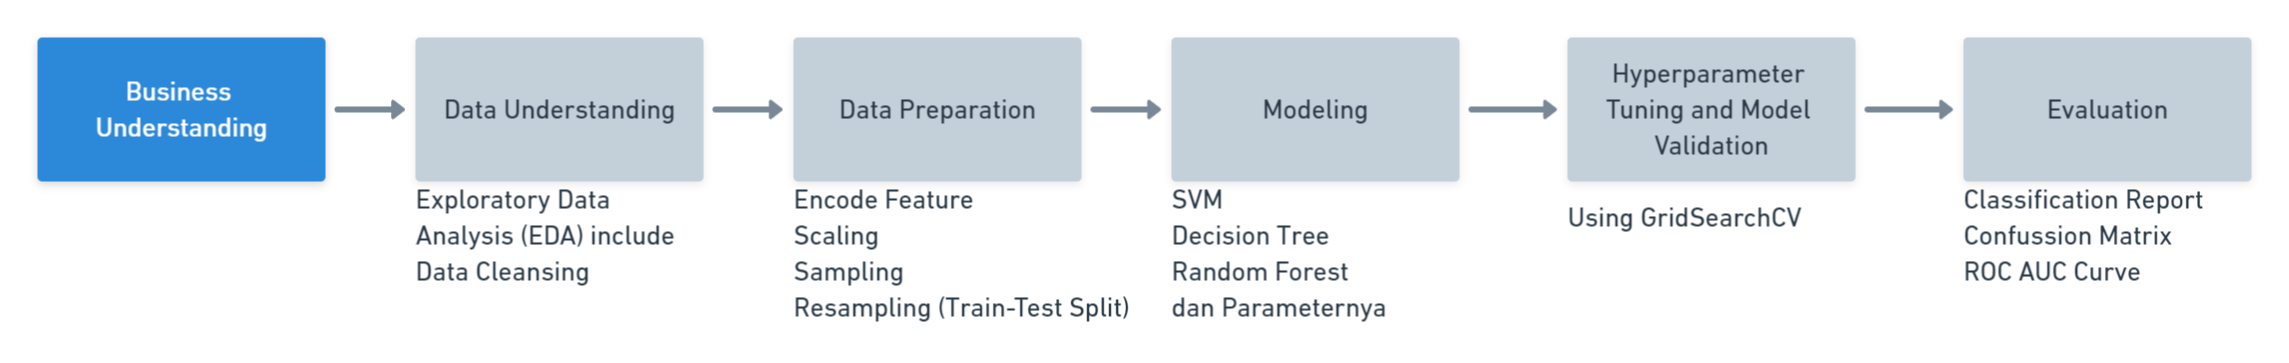

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')

## Load Datasets

In [2]:
data = pd.read_csv('telco.csv')
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Data Understanding

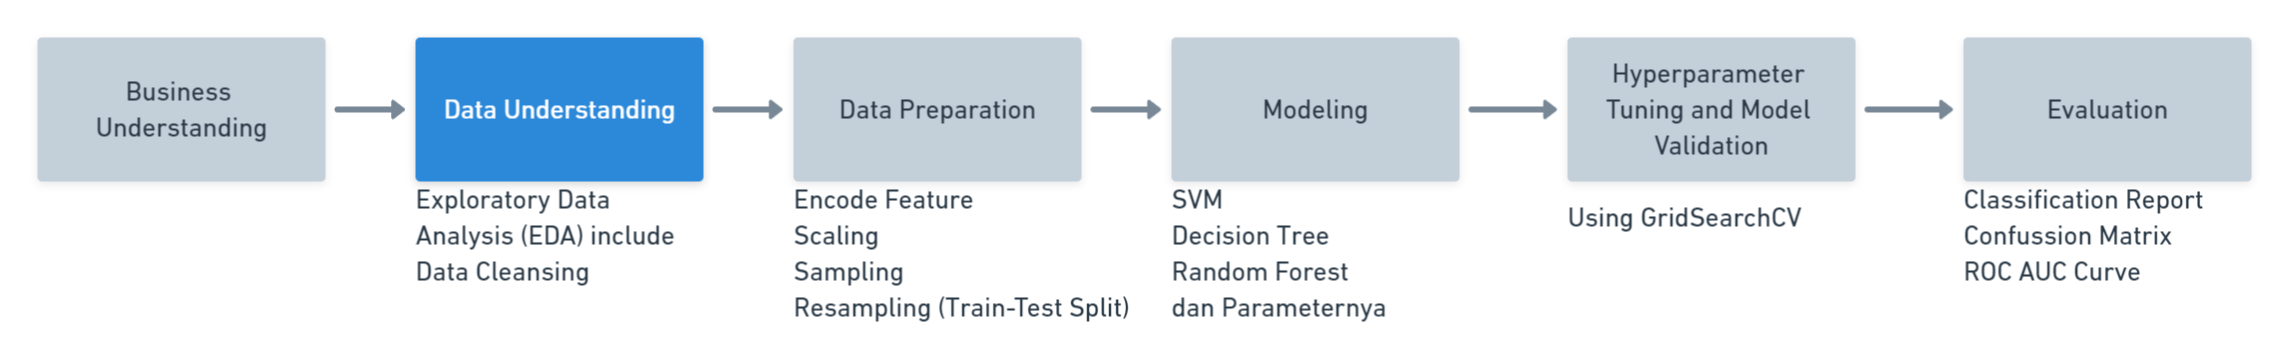

In [3]:
data.shape

(7043, 21)

In [4]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
kolom_inkonsisten = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset includes information about:
+ Customers who churned — the column is called Churn
+ Services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ Customer account information — how long they’ve been a customer, the type of contract (month-to-month, one-year, two-years), payment method, paperless billing, monthly charges, and total charges
+ Demographic info about customers — gender, age, and if they have partners and dependents

### Data Cleaning

#### Check Duplicate Data

In [8]:
data.duplicated().any()

False

#### Check Data Types

In [9]:
nama_kolom = list(data.columns)
# print(nama_kolom)

for kolom in nama_kolom:
    data[kolom] = data[kolom].replace(' ', np.nan)

In [10]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

#### Check Missing Value

In [11]:
data['Churn'].dtype

dtype('O')

In [12]:
def check_missing(dataframe):
    df_miss = pd.DataFrame(dataframe.isnull().sum(),columns=['Count'])
    df_miss['percent']= round(dataframe.isnull().sum()/dataframe.shape[0]*100, 2)
    df_miss.reset_index(inplace=True)
    tipe = []
    for kolom in list(df_miss['index']):
        tipe.append(data[kolom].dtype)
    df_miss['TipeData'] = tipe
    return df_miss.loc[df_miss['Count']>0, :]

In [13]:
check_missing(data)

,index,Count,percent,TipeData
19,TotalCharges,11,0.16,float64


#### Impute Missing value

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

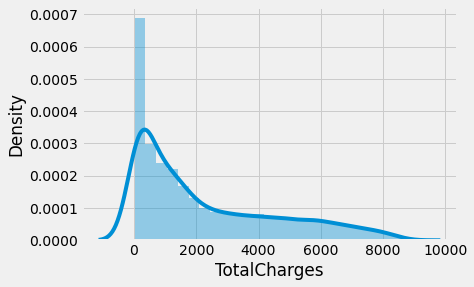

In [14]:
sns.distplot(data['TotalCharges'])

In [15]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [16]:
check_missing(data)

,index,Count,percent,TipeData


#### Outlier Detection

Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges'>

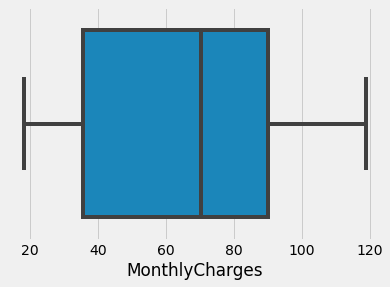

In [17]:
sns.boxplot(data['MonthlyCharges'])

TotalCharges

<AxesSubplot:xlabel='TotalCharges'>

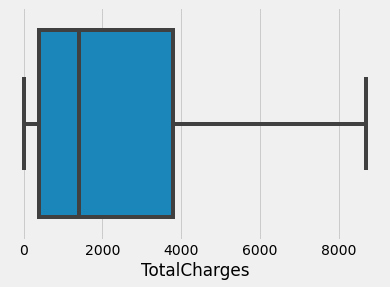

In [18]:
sns.boxplot(data['TotalCharges'])

Tenure

<AxesSubplot:xlabel='tenure'>

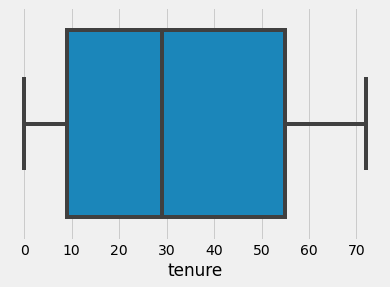

In [19]:
sns.boxplot(data['tenure'])

#### Handle Inconsistent Data

In [20]:
kolom_inkonsisten.pop(0)

'MultipleLines'

In [21]:
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})

data['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
for kolom in kolom_inkonsisten:
    data[kolom] = data[kolom].replace({'No internet service': 'No'})

data['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

### EDA

Bagaimana komposisi dari variabel target?

In [23]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

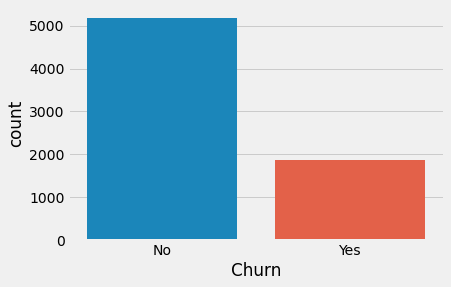

In [24]:
sns.countplot(data['Churn'])

Bagaimana Distribusi TotalCharge Terhadap Status Chrun atau Tidak Churn?

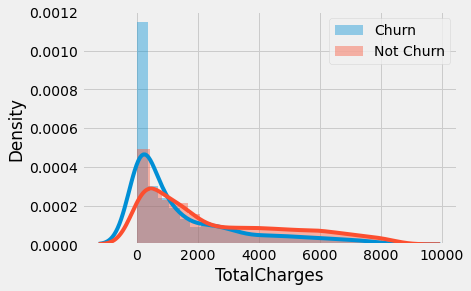

In [25]:
sns.distplot(data[data['Churn']=='Yes']['TotalCharges'], label='Churn')
sns.distplot(data[data['Churn']=='No']['TotalCharges'], label='Not Churn')
plt.legend()

Bagaimana Komposisi Gender Terhadap Variabel Target

<AxesSubplot:xlabel='gender', ylabel='count'>

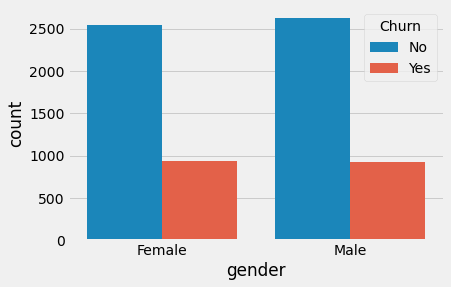

In [26]:
sns.countplot(data['gender'], hue=data['Churn'])

# Data Preparation

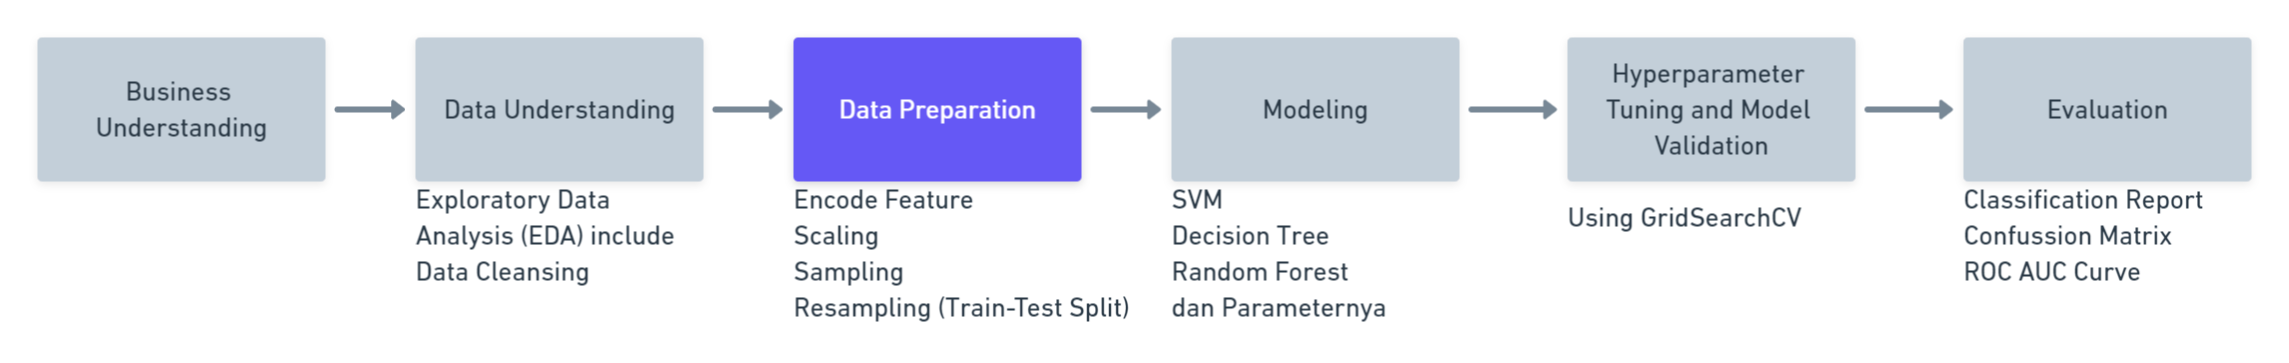

#### Encoding Variables

In [27]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [28]:
kolom_object = list(data.select_dtypes('object').columns)

In [29]:
biner = []
non_biner = []

for kolom in kolom_object:
    if data[kolom].nunique()>2:
        non_biner.append(kolom)
    else:
        biner.append(kolom)

In [30]:
biner.pop()

'Churn'

Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for kolom in biner:
    data[kolom] = le.fit_transform(data[kolom])

In [32]:
ohe = ['InternetService', 'PaymentMethod']

ordinal = {
    'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'Churn' : {'Yes': 1, 'No': 0}
}

In [33]:
data = data.replace(ordinal)

In [39]:
#one hot encoding
data = pd.get_dummies(data, columns=ohe)

In [41]:
data.drop('customerID', axis=1, inplace=True)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,53.85,108.15,1,1,0,0,0,0,0,1


## Data Partition

In [43]:
X = data.drop('Churn', axis=1)
y = data[['Churn']]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Sampling

### SMOTE (Synthetic Minority Oversampling Technique)

In [49]:
y_train.value_counts()

Churn
0        4138
1        1496
dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
y_smote.value_counts()

Churn
0        4138
1        4138
dtype: int64

### Undersampling

In [51]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X_train, y_train)
y_under.value_counts()

Churn
0        1496
1        1496
dtype: int64

# Modeling

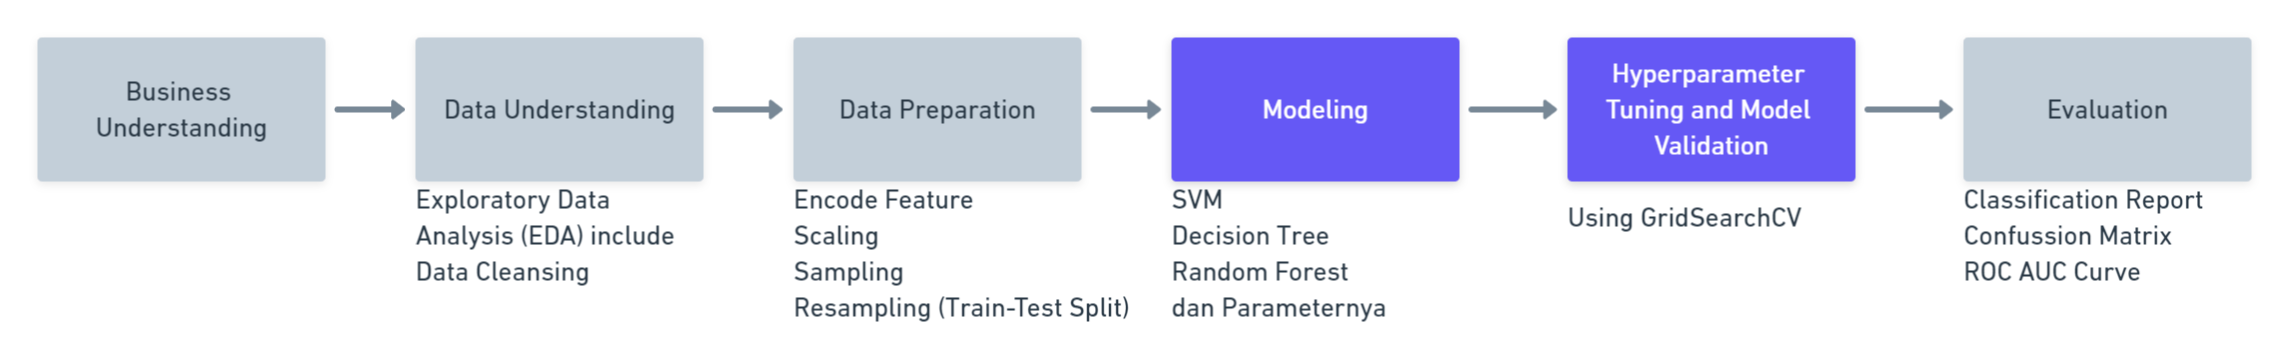

## Base Model

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt_smote = DecisionTreeClassifier()
dt_under = DecisionTreeClassifier()

#training
dt_smote.fit(X_smote, y_smote)
dt_under.fit(X_under, y_under)

dt_pred_smote = dt_smote.predict(X_test)
dt_pred_under = dt_under.predict(X_test)

#### Evaluation

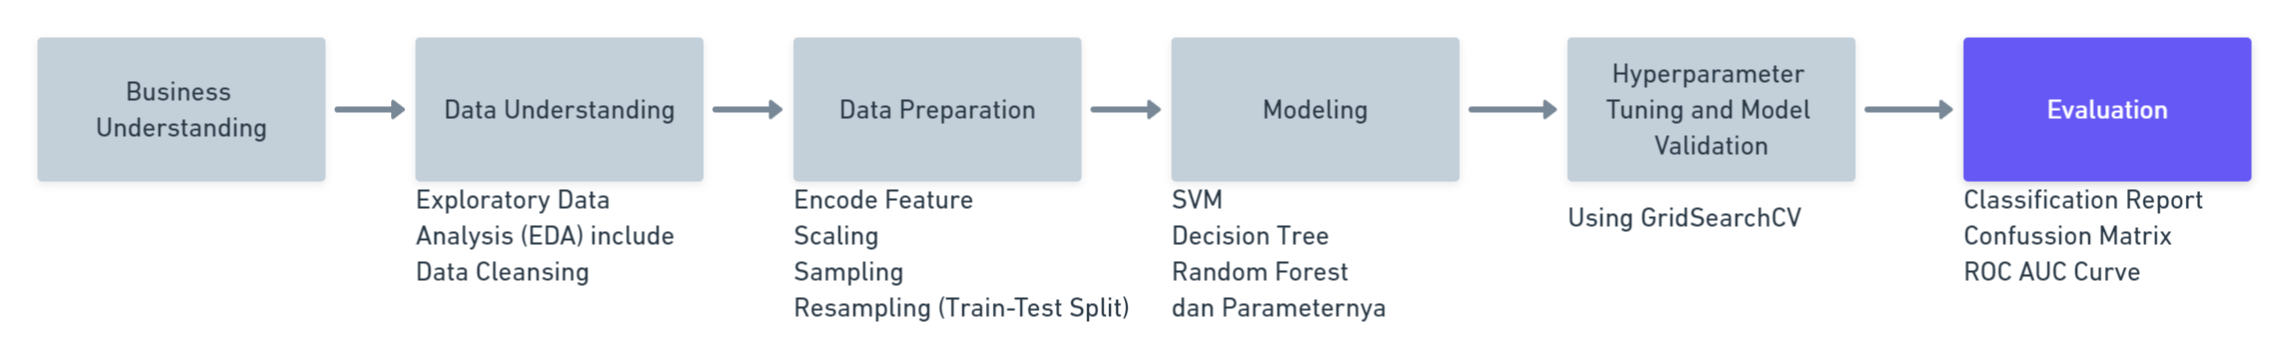

In [54]:
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, roc_auc_score

SMOTE

              precision    recall  f1-score   support

          No       0.82      0.79      0.80      1036
         Yes       0.47      0.51      0.49       373

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409



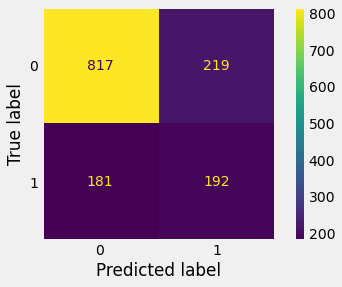

In [59]:
plot_confusion_matrix(dt_smote, X_test, y_test)
print(classification_report(y_test, dt_pred_smote, target_names=['No', 'Yes']))
plt.grid(False)

Text(0.5, 1.0, 'ROC Curve SMOTE : Decision Tree')

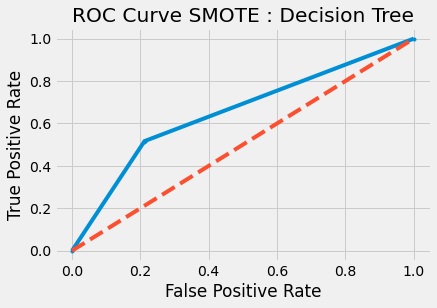

In [66]:
dt_pred_smote_proba = dt_smote.predict_proba(X_test)
dt_pred_smote_proba = dt_pred_smote_proba[:,1]
dt_fpr_smote, dt_tpr_smote, dt_threshold_smote = roc_curve(y_test['Churn'], dt_pred_smote_proba)

plt.plot(dt_fpr_smote, dt_tpr_smote, marker='.')
plt.plot([0,1], ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SMOTE : Decision Tree')

In [67]:
print(roc_auc_score(y_test, dt_pred_smote))

0.6516776734605153


Undersampling

              precision    recall  f1-score   support

          No       0.85      0.69      0.76      1036
         Yes       0.43      0.66      0.52       373

    accuracy                           0.68      1409
   macro avg       0.64      0.67      0.64      1409
weighted avg       0.74      0.68      0.70      1409



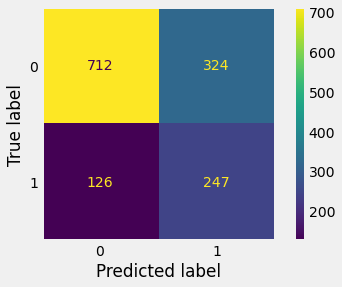

In [68]:
plot_confusion_matrix(dt_under, X_test, y_test)
print(classification_report(y_test, dt_pred_under, target_names=['No', 'Yes']))
plt.grid(False)

Text(0.5, 1.0, 'ROC Curve under : Decision Tree')

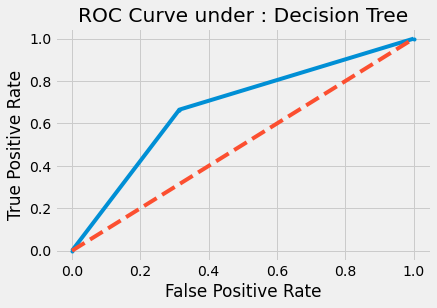

In [70]:
dt_pred_under_proba = dt_under.predict_proba(X_test)
dt_pred_under_proba = dt_pred_under_proba[:,1]
dt_fpr_under, dt_tpr_under, dt_threshold_under = roc_curve(y_test, dt_pred_under_proba)

plt.plot(dt_fpr_under, dt_tpr_under, marker='.')
plt.plot([0,1], ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve under : Decision Tree')

In [71]:
print(roc_auc_score(y_test, dt_pred_under))

0.6747285393397993


## Model Selection and Hyperparameter Tuning

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [74]:
model_param = {
    'DecisionTree': {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy']
        }
    },
    'RandomForest': {
        'model' : RandomForestClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'n_estimators' : [100, 200, 300],
            'n_jobs' : [-1]
        }
    },
    'XGBoost' : {
        'model' : GradientBoostingClassifier(),
        'params' : {
            'loss' : ['deviance', 'exponential'],
            'learning_rate' : [0.1, 0.2, 0.3]
        }
    }
}

In [75]:
scores = []

for model_name, mp in model_param.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_under, y_under)
    scores.append({
        'model' : model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

,model,best_score,best_param
0,DecisionTree,0.679466,NaN
1,RandomForest,0.749329,NaN
2,XGBoost,0.755009,NaN


In [79]:
df_grid = pd.DataFrame(scores)
df_grid

,model,best_score,best_params
0,DecisionTree,0.679466,{'criterion': 'gini'}
1,RandomForest,0.749329,"{'criterion': 'gini', 'n_estimators': 300, 'n_..."
2,XGBoost,0.755009,"{'learning_rate': 0.1, 'loss': 'exponential'}"


In [80]:
scores_smote = []

for model_name, mp in model_param.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_smote, y_smote)
    scores_smote.append({
        'model' : model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [83]:
grid_smote = pd.DataFrame(scores_smote)

In [86]:
grid_smote

,model,best_score,best_params
0,DecisionTree,0.791458,{'criterion': 'gini'}
1,RandomForest,0.841242,"{'criterion': 'entropy', 'n_estimators': 200, ..."
2,XGBoost,0.834111,"{'learning_rate': 0.1, 'loss': 'exponential'}"


In [85]:
grid_smote[grid_smote['model']=='RandomForest']['best_params']

1    {'criterion': 'entropy', 'n_estimators': 200, ...
Name: best_params, dtype: object

## Re Modeling and Evaluation

In [87]:
model = RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1)

model.fit(X_smote, y_smote)

pred = model.predict(X_test)

              precision    recall  f1-score   support

          No       0.85      0.86      0.85      1036
         Yes       0.59      0.58      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



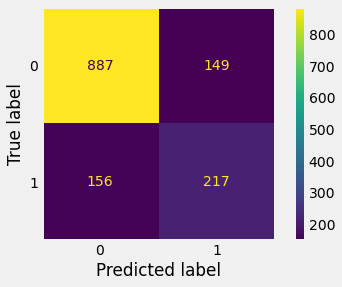

In [88]:
plot_confusion_matrix(model, X_test, y_test)
print(classification_report(y_test, pred, target_names=['No', 'Yes']))
plt.grid(False)

Text(0.5, 1.0, 'ROC Curve')

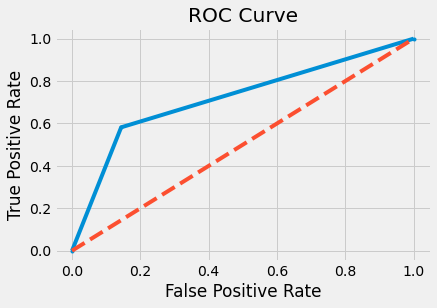

In [89]:
pred_proba = model.predict_proba(X_test)
pred_proba = pred_proba[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)

plt.plot(fpr, tpr, marker='.')
plt.plot([0,1], ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [90]:
print(roc_auc_score(y_test, pred))

0.7189735215874627


Cara menaikan akurasi

1. Pastikan data sudah clean (Cleansing)
2. Feature Extraction (Feature Engineering)
3. Feature Selection (Feature Engineering)
4. Hyperparameter Tuning (Modeling)
5. Nambah model (Modeling)

### Feature Importance

In [91]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02487
Feature: 1, Score: 0.01532
Feature: 2, Score: 0.02565
Feature: 3, Score: 0.02913
Feature: 4, Score: 0.13562
Feature: 5, Score: 0.00968
Feature: 6, Score: 0.01710
Feature: 7, Score: 0.03840
Feature: 8, Score: 0.02346
Feature: 9, Score: 0.01720
Feature: 10, Score: 0.03274
Feature: 11, Score: 0.01540
Feature: 12, Score: 0.01597
Feature: 13, Score: 0.10011
Feature: 14, Score: 0.02090
Feature: 15, Score: 0.15378
Feature: 16, Score: 0.14916
Feature: 17, Score: 0.02172
Feature: 18, Score: 0.02644
Feature: 19, Score: 0.02818
Feature: 20, Score: 0.02569
Feature: 21, Score: 0.02558
Feature: 22, Score: 0.02310
Feature: 23, Score: 0.02480


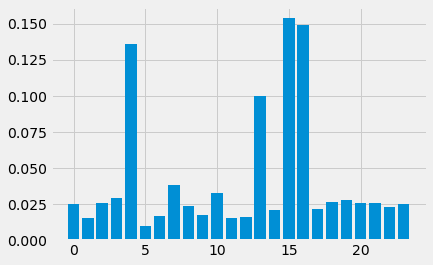

In [93]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [98]:
imp = pd.DataFrame({
    'Column' : list(X_train.columns),
    'Score' : importance
})

<AxesSubplot:xlabel='Column'>

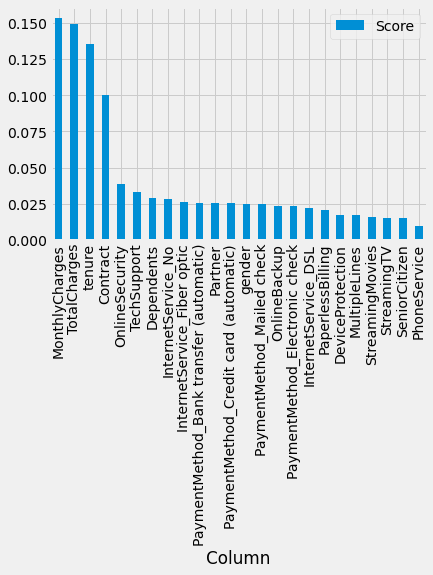

In [103]:
imp.sort_values(by='Score', ascending=False).set_index('Column').plot.bar()